In [5]:
##Importar librerías a utilizar
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import os
import glob
import pandas as pd
import re
import seaborn as sns

In [6]:
import glob
files=glob.glob("./archivos//*.csv")

In [7]:
files

['./archivos\\2015 Births.csv',
 './archivos\\2016 Births.csv',
 './archivos\\2017 Births.csv',
 './archivos\\2018 Births.csv',
 './archivos\\2019 Births.csv']

In [8]:
data1=pd.read_csv(files[0],usecols=[0,1,2,3,6])
data1_MX=data1[data1['Country']==' Mexico  ']

In [9]:
data1_MX

,Country,Year,Area,Sex,Value
431,Mexico,2015,Total,Both Sexes,2096274
432,Mexico,2015,Total,Male,1068348
433,Mexico,2015,Total,Female,1027913
434,Mexico,2015,Urban,Both Sexes,1540464
435,Mexico,2015,Urban,Male,785867
436,Mexico,2015,Urban,Female,754585
437,Mexico,2015,Rural,Both Sexes,442539
438,Mexico,2015,Rural,Male,225103
439,Mexico,2015,Rural,Female,217436


In [10]:
data2=pd.read_csv(files[1],usecols=[0,1,2,3,6])
data2_MX=data2[data2['Country']==' Mexico  ']

In [11]:
data2_MX

,Country,Year,Area,Sex,Value
419,Mexico,2016,Total,Both Sexes,2028358
420,Mexico,2016,Total,Male,1032107
421,Mexico,2016,Total,Female,996234
422,Mexico,2016,Urban,Both Sexes,1476247
423,Mexico,2016,Urban,Male,751277
424,Mexico,2016,Urban,Female,724957
425,Mexico,2016,Rural,Both Sexes,440219
426,Mexico,2016,Rural,Male,223909
427,Mexico,2016,Rural,Female,216307


In [12]:
data3=pd.read_csv(files[2],usecols=[0,1,2,3,6])
data3_MX=data3[data3['Country']==' Mexico  ']

In [13]:
data3_MX

,Country,Year,Area,Sex,Value
417,Mexico,2017,Total,Both Sexes,2000591
418,Mexico,2017,Total,Male,1020094
419,Mexico,2017,Total,Female,980490
420,Mexico,2017,Urban,Both Sexes,1468199
421,Mexico,2017,Urban,Male,748919
422,Mexico,2017,Urban,Female,719277
423,Mexico,2017,Rural,Both Sexes,438619
424,Mexico,2017,Rural,Male,223362
425,Mexico,2017,Rural,Female,215256


In [14]:
data4=pd.read_csv(files[3],usecols=[0,1,2,3,6])
data4_MX=data4[data4['Country']==' Mexico  ']

In [15]:
data4_MX

,Country,Year,Area,Sex,Value
352,Mexico,2018,Total,Both Sexes,2162535


In [16]:
data5=pd.read_csv(files[4],usecols=[0,1,2,3,6])
data5_MX=data5[data5['Country']==' Mexico  ']

In [17]:
data5_MX

,Country,Year,Area,Sex,Value
97,Mexico,2019,Total,Both Sexes,2092214


In [18]:
import glob
files_2=glob.glob("./archivos_2//*.txt")

In [19]:
files_2

['./archivos_2\\2015 Urban.txt',
 './archivos_2\\2016 Urban.txt',
 './archivos_2\\2017 Urban.txt']

In [20]:
archivo=pd.read_csv(files_2[0],usecols=[0,1,2,3])
archivo

,Country,Year,Area,Value
0,Mexico,2015,Urban,1540464


In [21]:
archivo2=pd.read_csv(files_2[1],usecols=[0,1,2,3])
archivo2

,Country,Year,Area,Value
0,Mexico,2016,Urban,1476247


In [22]:
archivo3=pd.read_csv(files_2[2],usecols=[0,1,2,3])
archivo3

,Country,Year,Area,Value
0,Mexico,2017,Urban,1468199


In [23]:
total_urban=pd.concat([archivo,archivo2,archivo3], axis=0)
from IPython.display import HTML, display_html, display
display(HTML('<h2>Total de natalicios en zonas urbanas</h2>'))
display_html(total_urban)

,Country,Year,Area,Value
0,Mexico,2015,Urban,1540464
0,Mexico,2016,Urban,1476247
0,Mexico,2017,Urban,1468199


<Figure size 2160x3600 with 0 Axes>

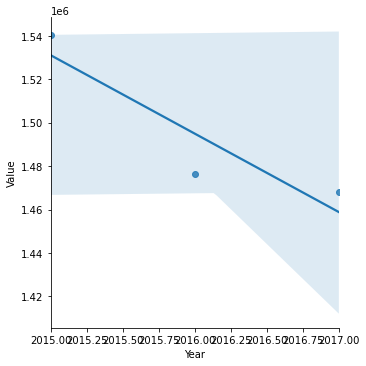

In [77]:
plt.figure(figsize=(30,50))
g=sns.lmplot(x=('Year'),y=('Value'),data=total_urban,palette='Set1')
from IPython.display import HTML, display_html, display
display(HTML('<h2>Total de natalicios en zonas urbanas</h2>'))
display_html(g)

[[2015]
 [2016]
 [2017]]
LinearRegression()
[-36132.5]
y=-36132.499999999985*x+74338089.99999997
[1531102.5 1494970.  1458837.5]


<ipython-input-25-7bcdcab7a4e8>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=x[:,np.newaxis]


Text(0, 0.5, 'Valor')

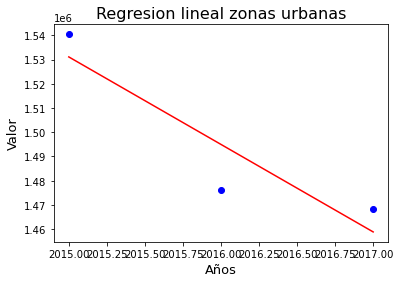

In [25]:
##Podremos predecir el número de natalicios en zonas urbanas para el año 2018 y 2019?
from sklearn import linear_model
from sklearn.metrics import r2_score
regr=linear_model.LinearRegression()

x=total_urban['Year']
y=total_urban['Value']

X=x[:,np.newaxis]
print(X)
print(regr.fit(X,y))
print(regr.coef_)
m=regr.coef_[0]
b=regr.intercept_
y_p=m*X+b
print('y={0}*x+{1}'.format(m,b))
print(regr.predict(X)[0:3])
plt.scatter(x,y,color='blue')
plt.plot(x,y_p,color='red')
plt.title('Regresion lineal zonas urbanas', fontsize=16)
plt.xlabel('Años',fontsize=13)
plt.ylabel('Valor',fontsize=13)

In [26]:
##Predicción 2018 y 2019
prediccionUrban_2018= -36132.499999999985*(2018)+74338089.99999997
prediccionUrban_2018

1422705.0

In [27]:
prediccionUrban_2019=-36132.499999999985*(2019)+74338089.99999997
prediccionUrban_2019

1386572.5

In [28]:
import glob
files_3=glob.glob("./archivos_3//*.txt")

In [29]:
files_3

['./archivos_3\\2015 Rural.txt',
 './archivos_3\\2016 Rural.txt',
 './archivos_3\\2017 Rural.txt']

In [30]:
archivo4=pd.read_csv(files_3[0],usecols=[0,1,2,3])
archivo4

,Country,Year,Area,Value
0,Mexico,2015,Rural,442539


In [31]:
archivo5=pd.read_csv(files_3[1],usecols=[0,1,2,3])
archivo5

,Country,Year,Area,Value
0,Mexico,2016,Rural,440219


In [32]:
archivo6=pd.read_csv(files_3[2],usecols=[0,1,2,3])
archivo6

,Country,Year,Area,Value
0,Mexico,2017,Rural,438619


In [33]:
total_rural=pd.concat([archivo4,archivo5,archivo6], axis=0)
from IPython.display import HTML, display_html, display
display(HTML('<h2>Total de natalicios en zonas rurales</h2>'))
display_html(total_rural)

,Country,Year,Area,Value
0,Mexico,2015,Rural,442539
0,Mexico,2016,Rural,440219
0,Mexico,2017,Rural,438619


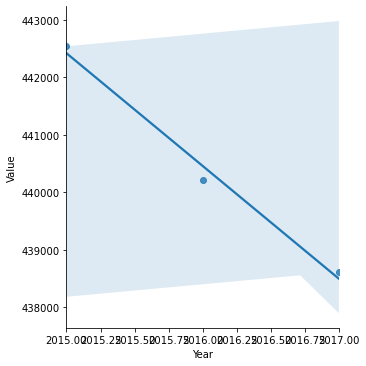

In [34]:
g=sns.lmplot(x=('Year'),y=('Value'),data=total_rural,palette='Set1')
from IPython.display import HTML, display_html, display
display(HTML('<h2>Total de natalicios en zonas rurales</h2>'))
display_html(g)

[[2015]
 [2016]
 [2017]]
LinearRegression()
[-1960.]
y=-1959.9999999999993*x+4391818.999999998
[442419. 440459. 438499.]


<ipython-input-35-9d2882bbf6a2>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=x[:,np.newaxis]


Text(0, 0.5, 'Valor')

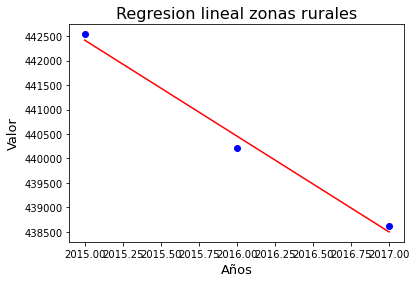

In [35]:
##Podremos predecir el número de natalicios en zonas rurales para el año 2018 y 2019?
from sklearn import linear_model
from sklearn.metrics import r2_score
regr=linear_model.LinearRegression()

x=total_rural['Year']
y=total_rural['Value']

X=x[:,np.newaxis]
print(X)
print(regr.fit(X,y))
print(regr.coef_)
m=regr.coef_[0]
b=regr.intercept_
y_p=m*X+b
print('y={0}*x+{1}'.format(m,b))
print(regr.predict(X)[0:3])
plt.scatter(x,y,color='blue')
plt.plot(x,y_p,color='red')
plt.title('Regresion lineal zonas rurales', fontsize=16)
plt.xlabel('Años',fontsize=13)
plt.ylabel('Valor',fontsize=13)

In [36]:
##Predicción 2018 y 2019
prediccionRural_2018= -1959.9999999999993*(2018)+4391818.999999998
prediccionRural_2018

436538.99999999953

In [37]:
prediccionRural_2019= -1959.9999999999993*(2019)+4391818.999999998
prediccionRural_2019

434578.99999999953

In [38]:
##Suma entre las predicciones de lo rural y urbano
total_2018= prediccionUrban_2018+prediccionRural_2018
total_2018

1859243.9999999995

In [39]:
total_2019=prediccionUrban_2019+prediccionRural_2019
total_2019

1821151.4999999995

In [40]:
##Comparación de los totales de los archivos
import glob
files_4=glob.glob("./archivos_4//*.txt")

In [41]:
files_4

['./archivos_4\\2018 Total.txt', './archivos_4\\2019 Total.txt']

In [42]:
archivo7=pd.read_csv(files_4[0],usecols=[0,1,2,3])
archivo7

,Country,Year,Area,Value
0,Mexico,2018,Total,2162535


In [43]:
archivo8=pd.read_csv(files_4[1],usecols=[0,1,2,3])
archivo8

,Country,Year,Area,Value
0,Mexico,2019,Total,2092214


In [44]:
##DataFrame Urban y Rural 2018/2019
rural_2018={'Country':['Mexico'],'Year':['2018'],'Area':['Rural'],'Value':['436538.99']}
rural2018=pd.DataFrame(rural_2018)
print(rural2018)

  Country  Year   Area      Value
0  Mexico  2018  Rural  436538.99


In [45]:
rural_2019={'Country':['Mexico'],'Year':['2018'],'Area':['Rural'],'Value':['434578.99']}
rural2019=pd.DataFrame(rural_2019)
print(rural2019)

  Country  Year   Area      Value
0  Mexico  2018  Rural  434578.99


In [46]:
urban_2018={'Country':['Mexico'],'Year':['2018'],'Area':['Urban'],'Value':['1422705']}
urban2018=pd.DataFrame(urban_2018)
print(urban2018)

  Country  Year   Area    Value
0  Mexico  2018  Urban  1422705


In [47]:
urban_2019={'Country':['Mexico'],'Year':['2019'],'Area':['Urban'],'Value':['1386572.5']}
urban2019=pd.DataFrame(urban_2019)
print(urban2019)

  Country  Year   Area      Value
0  Mexico  2019  Urban  1386572.5


In [48]:
import glob
files_5=glob.glob("./archivos_5//*.txt")

In [49]:
files_5

['./archivos_5\\2018 Urban.txt', './archivos_5\\2019 Urban.txt']

In [50]:
archivo9=pd.read_csv(files_5[0],usecols=[0,1,2,3])
archivo9

,Country,Year,Area,Value
0,Mexico,2018,Urban,1422705


In [51]:
archivo10=pd.read_csv(files_5[1],usecols=[0,1,2,3])
archivo10

,Country,Year,Area,Value
0,Mexico,2019,Urban,1386572.5


In [52]:
total1_urban=pd.concat([archivo,archivo2,archivo3,archivo9,archivo10])
total1_urban

,Country,Year,Area,Value
0,Mexico,2015,Urban,1540464.0
0,Mexico,2016,Urban,1476247.0
0,Mexico,2017,Urban,1468199.0
0,Mexico,2018,Urban,1422705.0
0,Mexico,2019,Urban,1386572.5


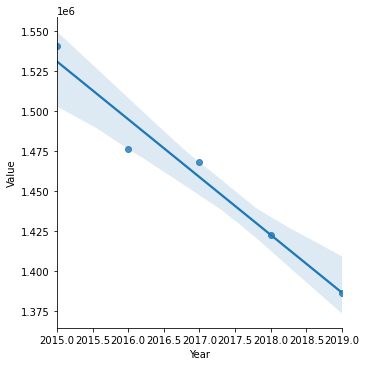

In [53]:
grafica=sns.lmplot(x=('Year'),y=('Value'),data=total1_urban,palette='Set1')
from IPython.display import HTML, display_html, display
display(HTML('<h2>Total de natalicios en zonas urbanos predicción</h2>'))
display_html(grafica)

In [54]:
import glob
files_6=glob.glob("./archivos_6//*.txt")
files_6

['./archivos_6\\2018 Rural.txt', './archivos_6\\2019 Rural.txt']

In [55]:
archivo11=pd.read_csv(files_6[0],usecols=[0,1,2,3])
archivo11

,Country,Year,Area,Value
0,Mexico,2018,Rural,436538.99


In [56]:
archivo12=pd.read_csv(files_6[1],usecols=[0,1,2,3])
archivo12

,Country,Year,Area,Value
0,Mexico,2019,Rural,434578.99


In [57]:
total1_rural=pd.concat([archivo4,archivo5,archivo6,archivo11,archivo12])
total1_rural

,Country,Year,Area,Value
0,Mexico,2015,Rural,442539.00
0,Mexico,2016,Rural,440219.00
0,Mexico,2017,Rural,438619.00
0,Mexico,2018,Rural,436538.99
0,Mexico,2019,Rural,434578.99


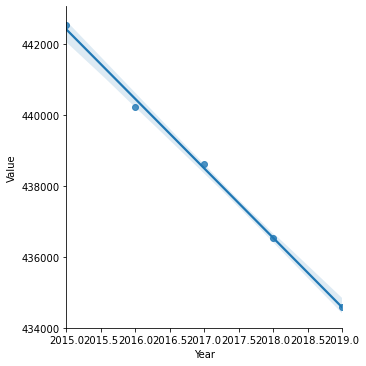

In [58]:
grafica1=sns.lmplot(x=('Year'),y=('Value'),data=total1_rural,palette='Set1')
from IPython.display import HTML, display_html, display
display(HTML('<h2>Total de natalicios en zonas rurales predicción</h2>'))
display_html(grafica1)

In [59]:
##Comparación entre los resultados
datos={'Country':['Mexico'],'Year':['2018'],'Area':['Total'],'Value':['1859243.99']}
df=pd.DataFrame(datos)
print(df)

  Country  Year   Area       Value
0  Mexico  2018  Total  1859243.99


In [60]:
datos_2={'Country':['Mexico'],'Year':['2019'],'Area':['Total'],'Value':['1821151.49']}
df_2=pd.DataFrame(datos_2)
print(df_2)

  Country  Year   Area       Value
0  Mexico  2019  Total  1821151.49


In [61]:
TOTAL=pd.concat([archivo7,archivo8,df,df_2], axis=0)
from IPython.display import HTML, display_html, display
display(HTML('<h2>Comparación entre los datos de UnData y las predicciones de la regresión</h2>'))
display_html(TOTAL)

,Country,Year,Area,Value
0,Mexico,2018,Total,2162535
0,Mexico,2019,Total,2092214
0,Mexico,2018,Total,1859243.99
0,Mexico,2019,Total,1821151.49


In [62]:
import glob
files_7=glob.glob("./archivos_7//*.txt")
files_7

['./archivos_7\\2015 Total.txt',
 './archivos_7\\2016 Total.txt',
 './archivos_7\\2017 Total.txt']

In [63]:
archivo13=pd.read_csv(files_7[0],usecols=[0,1,2,3])
archivo13

,Country,Year,Area,Value
0,Mexico,2015,Total,2096274


In [64]:
archivo14=pd.read_csv(files_7[1],usecols=[0,1,2,3])
archivo14

,Country,Year,Area,Value
0,Mexico,2016,Total,2028358


In [65]:
archivo15=pd.read_csv(files_7[2],usecols=[0,1,2,3])
archivo15

,Country,Year,Area,Value
0,Mexico,2017,Total,2000591


In [66]:
Total_general=pd.concat([archivo13,archivo14,archivo15,archivo7,archivo8])
Total_general

,Country,Year,Area,Value
0,Mexico,2015,Total,2096274
0,Mexico,2016,Total,2028358
0,Mexico,2017,Total,2000591
0,Mexico,2018,Total,2162535
0,Mexico,2019,Total,2092214


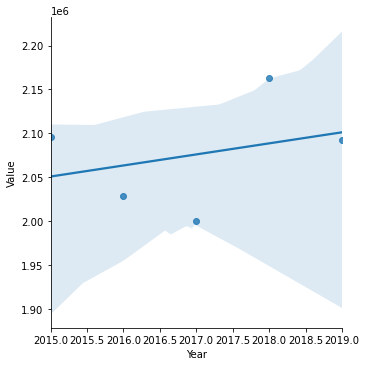

In [67]:
grafica2=sns.lmplot(x=('Year'),y=('Value'),data=Total_general,palette='Set1')
from IPython.display import HTML, display_html, display
display(HTML('<h2>Total de natalicios Undata</h2>'))
display_html(grafica2)

In [68]:
import glob
files_8=glob.glob("./archivos8//*.txt")
files_8

['./archivos8\\2018_prediccion.txt', './archivos8\\2019 prediccion.txt']

In [69]:
archivo16=pd.read_csv(files_8[0],usecols=[0,1,2,3])
archivo16

,Country,Year,Area,Value
0,Mexico,2018,Total,1859243.99


In [70]:
archivo17=pd.read_csv(files_8[1],usecols=[0,1,2,3])
archivo17

,Country,Year,Area,Value
0,Mexico,2019,Total,1821151.49


In [71]:
Total_pred=pd.concat([archivo13,archivo14,archivo15,archivo16,archivo17], axis=0)
Total_pred

,Country,Year,Area,Value
0,Mexico,2015,Total,2096274.00
0,Mexico,2016,Total,2028358.00
0,Mexico,2017,Total,2000591.00
0,Mexico,2018,Total,1859243.99
0,Mexico,2019,Total,1821151.49


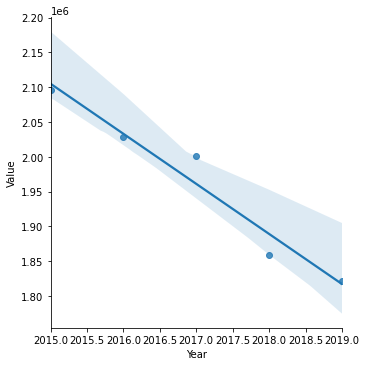

In [72]:
grafica3=sns.lmplot(x=('Year'),y=('Value'),data=Total_pred,palette='Set1')
from IPython.display import HTML, display_html, display
display(HTML('<h2>Total de natalicios predicción</h2>'))
display_html(grafica2)